In [11]:
import numpy as np
import networkx as nx
import os
import random

num_nodes = 1000000
m = 4
seed = 1

In [12]:
g = nx.barabasi_albert_graph(n = num_nodes, m = m, seed = seed)
print nx.is_connected(g)

True


In [13]:
scores = nx.pagerank(g, max_iter=100)
x = np.zeros((len(scores)))
for i in range(len(scores)):
    x[i] = scores[i]

x = np.array(x) * len(x)

In [16]:
output_folder = '../../dropbox/data/pr-%d-%d' % (num_nodes, m)
if not os.path.isdir(output_folder):
    os.makedirs(output_folder)

with open(output_folder + '/pr-0.85.txt', 'w') as f:
    for i in range(len(scores)):
        f.write('%.6f\n' % (scores[i] * len(scores)))
        
with open(output_folder + '/adj_list.txt', 'w') as f:
    for i in range(len(g)):
        neighbors = g.neighbors(i)
        f.write('%d' % len(neighbors))
        for j in neighbors:
            f.write(' %d' % j)
        f.write('\n')

with open(output_folder + '/meta.txt', 'w') as f:
    f.write('%d 1\n' % num_nodes)

In [18]:
output_folder = '../../dropbox/data/pr-%d-%d' % (num_nodes, m)

idxes = range(num_nodes)
random.shuffle(idxes)

t = int(len(idxes) * 0.9)    

with open(output_folder + '/test_idx.txt', 'w') as f:
    for i in range(t, len(idxes)):
        f.write('%d\n' % idxes[i])

for i in range(9):
    frac = (i + 1) * 0.1
    num_train = int(len(idxes) * frac)
    with open(output_folder + '/train_idx-%.1f.txt' % frac, 'w') as f:
        for i in range(num_train):
            f.write('%d\n' % idxes[i])

0.975714
975714


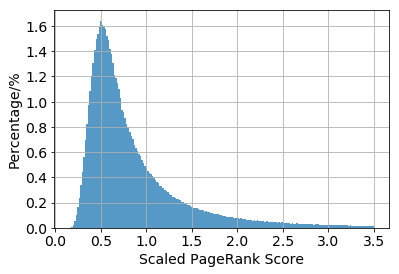

In [14]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = x[np.where(x < 3.5)]
n, bins, patches = plt.hist(x, 200, normed=1, alpha=0.75)
plt.xlabel('Scaled PageRank Score')
plt.ylabel('Percentage/%')
plt.grid(True)
ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
# plt.savefig('ba_%d_%d_hist.pdf' % (num_nodes, m), bbox_inches='tight')
# plt.show()
print len(x) / float(len(scores))
print len(x)